In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Անջատում ենք ավելորդ զգուշացումները մաքուր տեսքի համար
warnings.filterwarnings("ignore")

# Գրաֆիկների ոճը
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6) # Գրաֆիկների դիֆոլտ չափսը

# 1. Ընտրում ենք միայն անհրաժեշտ սյունակները (բազան շատ մեծ է)
required_columns = [
    'iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate',
    'city', 'latitude', 'longitude', 'success', 'suicide', 'attacktype1_txt',
    'targtype1_txt', 'gname', 'weaptype1_txt', 'nkill', 'nwound'
]

# 2. Բեռնում ենք տվյալները (ուշադրություն դարձրու encoding-ին)
# Ենթադրվում է, որ ֆայլի անունը globalterrorismdb_0718dist.csv է
try:
    df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', usecols=required_columns)
    print("Տվյալները հաջողությամբ բեռնվեցին:")
except FileNotFoundError:
    print("Ֆայլը չի գտնվել: Ստուգիր ֆայլի անունը և արդյոք այն նույն պապկայում է:")

# 3. Վերանվանում ենք սյունակները ավելի հարմար անուններով
df.rename(columns={
    'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'country_txt':'Country',
    'region_txt':'Region', 'provstate':'State', 'city':'City',
    'attacktype1_txt':'AttackType', 'targtype1_txt':'TargetType',
    'gname':'Group', 'weaptype1_txt':'Weapon', 'nkill':'Killed', 'nwound':'Wounded'
}, inplace=True)

df.head()

Տվյալները հաջողությամբ բեռնվեցին:


,Year,Month,Day,Country,Region,State,City,latitude,longitude,success,suicide,AttackType,TargetType,Group,Weapon,Killed,Wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,NaN,NaN


In [42]:
# --- DATA CLEANING & PREPROCESSING ---

# 1. Ստուգում ենք բաց թողնված արժեքները
print("Բաց թողնված արժեքները նախքան մաքրումը:\n", df.isnull().sum())

# 2. Մաքրման ռազմավարություն (Strategy)
# Killed (զոհվածներ) և Wounded (վիրավորներ) սյունակներում NaN-ը փոխարինում ենք 0-ով
df['Killed'] = df['Killed'].fillna(0).astype(int)
df['Wounded'] = df['Wounded'].fillna(0).astype(int)

# 3. Որակական տվյալների մաքրում
# Քաղաքների և Նահանգների դեպքում NaN-ը փոխարինում ենք 'Unknown'-ով
df['City'] = df['City'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

# 4. Ամսաթվերի շտկում (Time Consistency) - ՇԱՏ ԿԱՐԵՎՈՐ Է
# GTD-ում անհայտ օրերը կամ ամիսները նշվում են 0-ով:
# Դա խանգարում է datetime ստեղծելուն, դրա համար 0-ները դարձնում ենք 1:
df['Month'] = df['Month'].replace(0, 1)
df['Day'] = df['Day'].replace(0, 1)

# 5. Feature Engineering-ի մաս (միանգամից այստեղ ենք անում, որ մաքուր լինի)
# Ստեղծում ենք իրական 'Date' սյունակ, որը Python-ը կհասկանա որպես ժամանակ
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Ստուգում ենք արդյունքը
print("\nՄաքրումից հետո:\n", df.isnull().sum())
print("\nՆոր Date սյունակի տեսքը:\n", df[['Year', 'Month', 'Day', 'Date']].head())

df.head()

Բաց թողնված արժեքները նախքան մաքրումը:
 Year             0
Month            0
Day              0
Country          0
Region           0
State            0
City             0
latitude      1262
longitude     1262
success          0
suicide          0
AttackType       0
TargetType       0
Group            1
Weapon           1
Killed           0
Wounded          0
Decade           0
Date             0
dtype: int64

Մաքրումից հետո:
 Year             0
Month            0
Day              0
Country          0
Region           0
State            0
City             0
latitude      1262
longitude     1262
success          0
suicide          0
AttackType       0
TargetType       0
Group            1
Weapon           1
Killed           0
Wounded          0
Decade           0
Date             0
dtype: int64

Նոր Date սյունակի տեսքը:
    Year  Month  Day       Date
0  1970      7    2 1970-07-02
1  1970      1    1 1970-01-01
2  1970      1    1 1970-01-01
3  1970      1    1 1970-01-01
4  1970     

,Year,Month,Day,Country,Region,State,City,latitude,longitude,success,suicide,AttackType,TargetType,Group,Weapon,Killed,Wounded,Decade,Date
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1,0,Assassination,Private Citizens & Property,MANO-D,Unknown,1,0,1970,1970-07-02
1,1970,1,1,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0,0,1970,1970-01-01
2,1970,1,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,0,Assassination,Journalists & Media,Unknown,Unknown,1,0,1970,1970-01-01
3,1970,1,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,0,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0,0,1970,1970-01-01
4,1970,1,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,0,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0,0,1970,1970-01-01


In [58]:
# --- FEATURE ENGINEERING ---

# 1. Ստեղծում ենք 'Casualties' (Ընդհանուր տուժածներ)
# Սա թույլ կտա գնահատել հարձակման ընդհանուր վնասը
df['Casualties'] = df['Killed'] + df['Wounded']

# 2. Ստեղծում ենք 'Has_Casualties' (Եղե՞լ են արդյոք տուժածներ) - Binary Feature
# 1 եթե կան տուժածներ, 0 եթե ոչ
df['Has_Casualties'] = df['Casualties'].apply(lambda x: 1 if x > 0 else 0)

# 3. Դասակարգում ենք ըստ տասնամյակների (Decade)
# Սա կօգնի տեսնել գլոբալ թրենդերը ավելի խոշոր մասշտաբով
df['Decade'] = (df['Year'] // 10) * 10

df.head()

,Year,Month,Day,Country,Region,State,City,latitude,longitude,success,...,AttackType,TargetType,Group,Weapon,Killed,Wounded,Decade,Date,Casualties,Has_Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,18.456792,-69.951164,1,...,Assassination,Private Citizens & Property,MANO-D,Unknown,1,0,1970,1970-07-02,1,1
1,1970,1,1,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,1,...,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,Unknown,0,0,1970,1970-01-01,0,0
2,1970,1,1,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1,...,Assassination,Journalists & Media,Unknown,Unknown,1,0,1970,1970-01-01,1,1
3,1970,1,1,Greece,Western Europe,Attica,Athens,37.997490,23.762728,1,...,Bombing/Explosion,Government (Diplomatic),Unknown,Explosives,0,0,1970,1970-01-01,0,0
4,1970,1,1,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,1,...,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,Incendiary,0,0,1970,1970-01-01,0,0


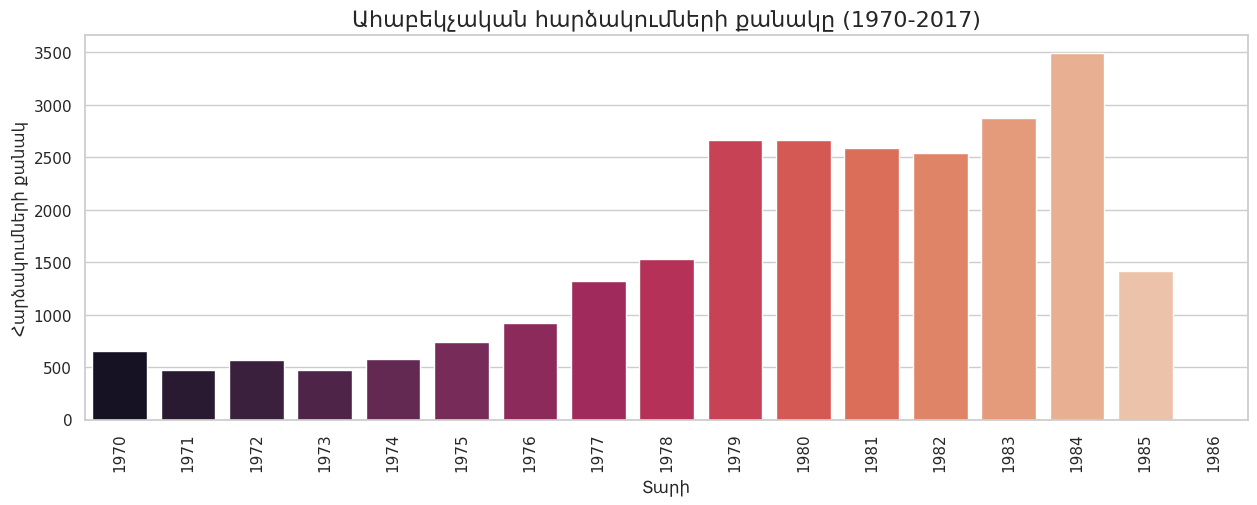

In [51]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Year', data=df, palette='rocket')
plt.xticks(rotation=90)
plt.title('Ահաբեկչական հարձակումների քանակը (1970-2017)', fontsize=16)
plt.ylabel('Հարձակումների քանակ')
plt.xlabel('Տարի')
plt.show()

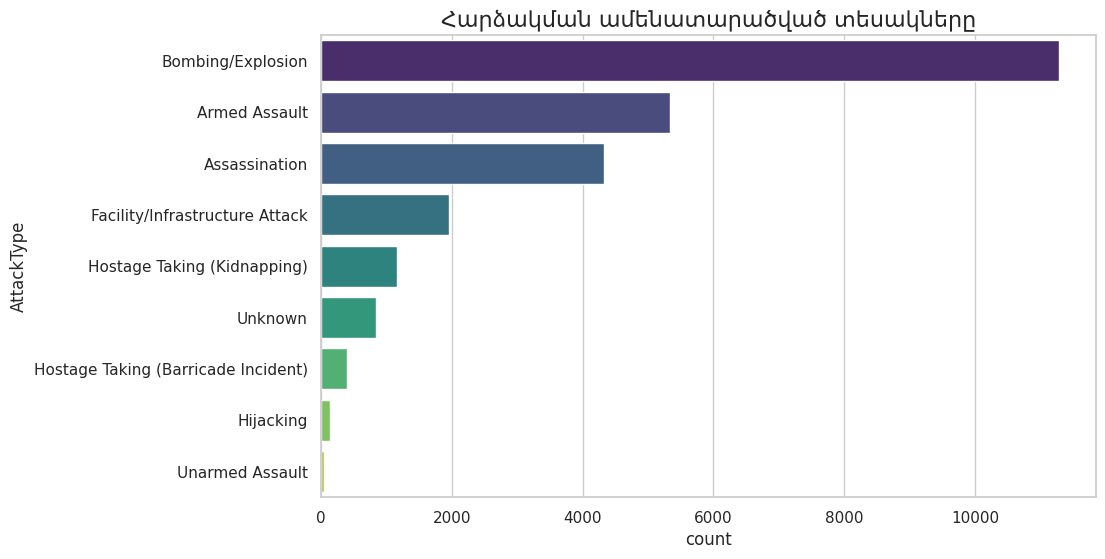

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(y='AttackType', data=df, order=df['AttackType'].value_counts().index, palette='viridis')
plt.title('Հարձակման ամենատարածված տեսակները', fontsize=16)
plt.show()

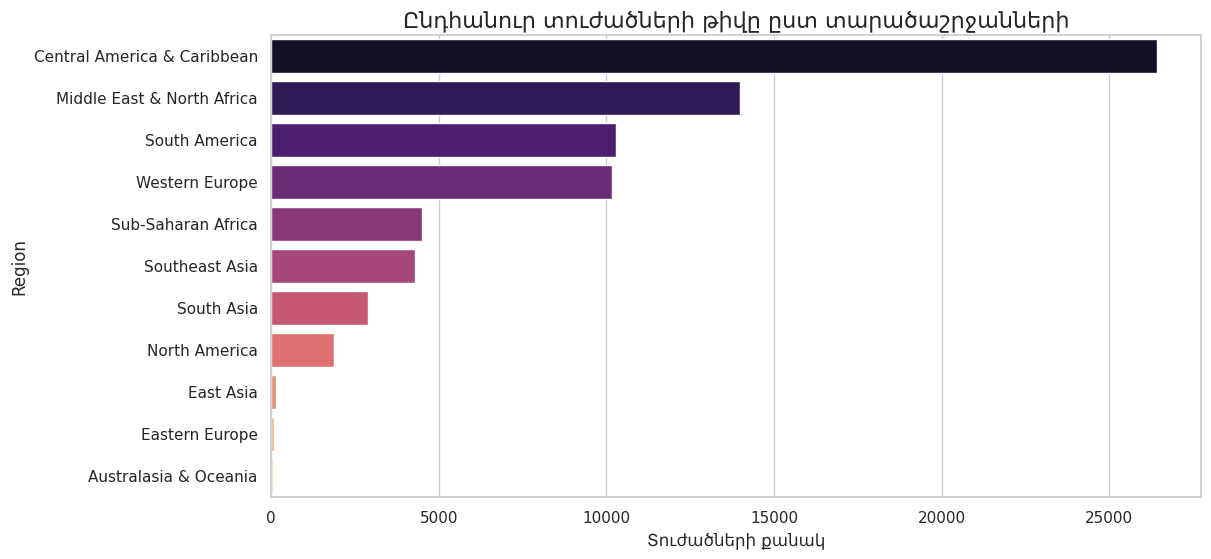

In [47]:
plt.figure(figsize=(12, 6))
# Խմբավորում ենք ըստ տարածաշրջանի և հաշվում ընդհանուր զոհերի թիվը
region_casualites = df.groupby('Region')['Casualties'].sum().sort_values(ascending=False)
sns.barplot(x=region_casualites.values, y=region_casualites.index, palette='magma')
plt.title('Ընդհանուր տուժածների թիվը ըստ տարածաշրջանների', fontsize=16)
plt.xlabel('Տուժածների քանակ')
plt.show()